# Optimised Model: 70% Training, 30% Validation Split - Data Augmentation - Final Model

In [ ]:
!pip install facenet-pytorch
!pip install torch torchvision
!pip install numpy
!pip install Pillow

# **Performing Data Augmentation and Extracting Features**

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
from torchvision import transforms
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.model_selection import StratifiedKFold
from google.colab import drive
import ipywidgets as widgets
from IPython.display import display
import io
import seaborn as sns
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Local Directory containing known faces with subfolders for each person
KNOWN_FACES_DIR = '/content/drive/MyDrive/Known_faces'

#Initialise Models for feature extraction
# Initialise MTCNN for face detection
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20, device=device)

# Initialise Inception Resnet V1 for face embeddings
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Lists to hold encodings and names
known_face_encodings = []
known_face_names = []

# Dataset collection
image_paths = []
labels = []

for root, dirs, files in os.walk(KNOWN_FACES_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            label = os.path.basename(root)  # Use the subfolder name (Group member name) as the class label
            image_paths.append(image_path)
            labels.append(label)

print(f"[INFO] Total images found: {len(image_paths)}")

# Perform Data Augmentation (1 Additional image for each existing image)
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

# Process images and generate embeddings
for idx, (image_path, label) in enumerate(zip(image_paths, labels)):
    try:
        # Load the image using PIL
        img = Image.open(image_path).convert('RGB')

        # Apply augmentation
        augmented_imgs = [img, augmentation_transforms(img)]

        for augmented_img in augmented_imgs:
            #Begin Feature Extraction
            # Detect face using MTCNN
            img_cropped = mtcnn(augmented_img)

            # Check if a face was detected in the image
            if img_cropped is not None:
                with torch.no_grad():
                    # Get the embedding for the detected face
                    embedding = resnet(img_cropped.unsqueeze(0).to(device))
                known_face_encodings.append(embedding[0].cpu().numpy())
                known_face_names.append(label)
            else:
                print(f"[WARNING] No face detected in image: {image_path}")
    except Exception as e:
        print(f"[ERROR] Error processing image {image_path}: {e}")

print(f"[INFO] Number of faces successfully encoded: {len(known_face_encodings)}")

# Now we convert data into training format
# Label encoding
label_to_idx = {name: idx for idx, name in enumerate(set(known_face_names))}
idx_to_label = {idx: name for name, idx in label_to_idx.items()}

X = np.array(known_face_encodings)
y = np.array([label_to_idx[name] for name in known_face_names])



Looking in indexes: https://download.pytorch.org/whl/cu118
Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

  0%|          | 0.00/107M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)

[INFO] Total images found: 195
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Yan/Yan_006.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Yan/Yan_007.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Yan/Yan_013.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Yan/Yan_005.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Yan/Yan_005.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Rhys/Rhys_022.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Rhys/Rhys_023.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Rhys/Rhys_025.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Rhys/Rhys_026.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Rhys/Rhys_026.jpg
[WARNING] No face detected in image: /content/drive/MyDrive/Known_faces/Rhys/Rh

# **Nerual-Network Set-Up and Training: Outputs Evaluation Metrics (Scroll to view them all)**

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50], Loss: 1.7845, Val Loss: 1.4637, Train Accuracy: 0.2069, Val Accuracy: 0.9735
Validation Precision: 0.9754, Recall: 0.9735, F1-Score: 0.9724
Model improved and saved.
Epoch [2/50], Loss: 1.4617, Val Loss: 1.0068, Train Accuracy: 0.9617, Val Accuracy: 0.9735
Validation Precision: 0.9754, Recall: 0.9735, F1-Score: 0.9724
Model improved and saved.
Epoch [3/50], Loss: 1.0040, Val Loss: 0.6308, Train Accuracy: 0.9808, Val Accuracy: 0.9735
Validation Precision: 0.9754, Recall: 0.9735, F1-Score: 0.9724
Model improved and saved.
Epoch [4/50], Loss: 0.6248, Val Loss: 0.4023, Train Accuracy: 0.9808, Val Accuracy: 0.9912
Validation Precision: 0.9916, Recall: 0.9912, F1-Score: 0.9911
Model improved and saved.
Epoch [5/50], Loss: 0.3956, Val Loss: 0.2751, Train Accuracy: 0.9847, Val Accuracy: 0.9912
Validation Precision: 0.9916, Recall: 0.9912, F1-Score: 0.9911
Model improved and saved.
Epoch [6/50], Loss: 0.2669, Val Loss: 0.2017, Train Accuracy: 0.9962, Val Accuracy: 0.9912
Validatio

<ipython-input-14-9e3af9f1537e>:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier.load_state_dict(torch.load("best_facial_recognition_classifier.pth"))


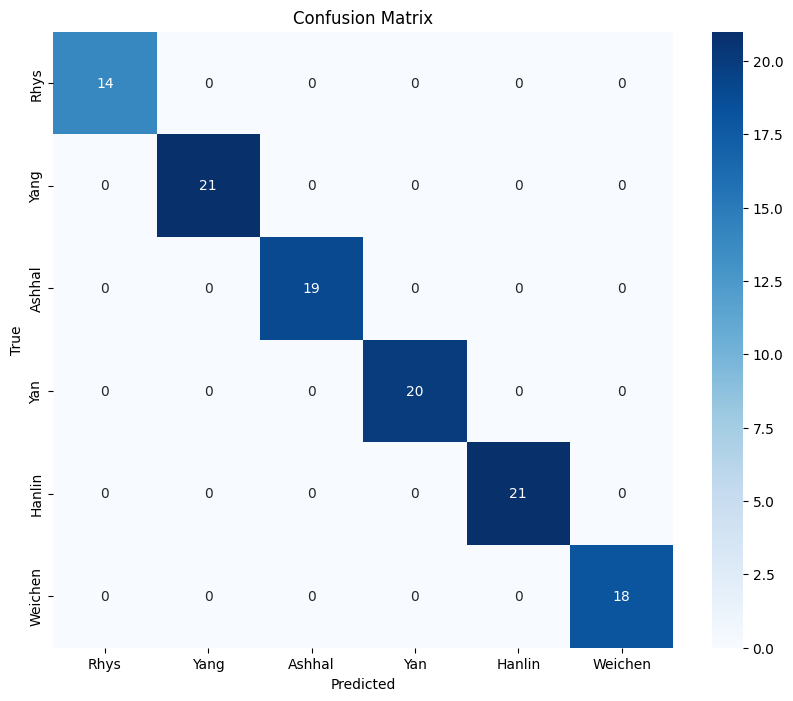

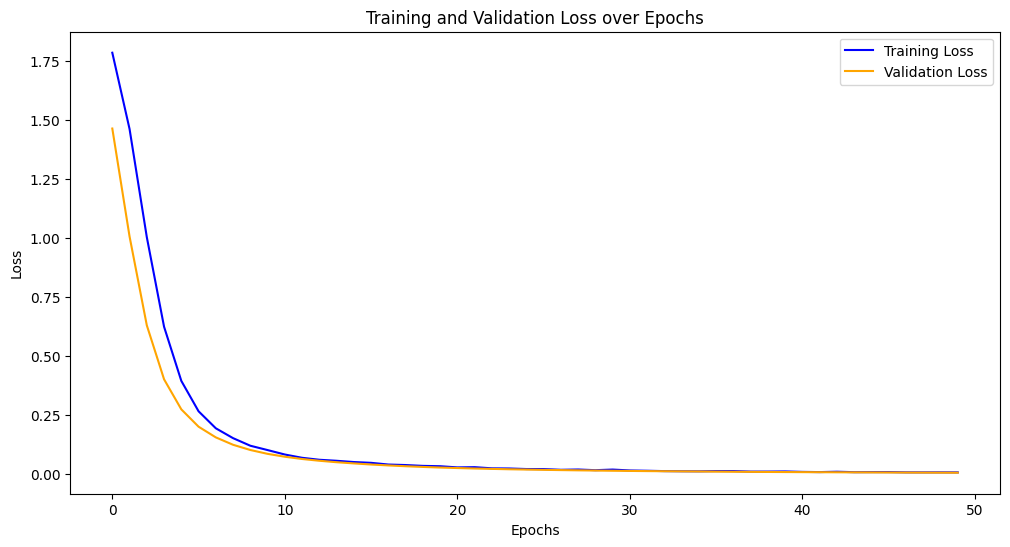

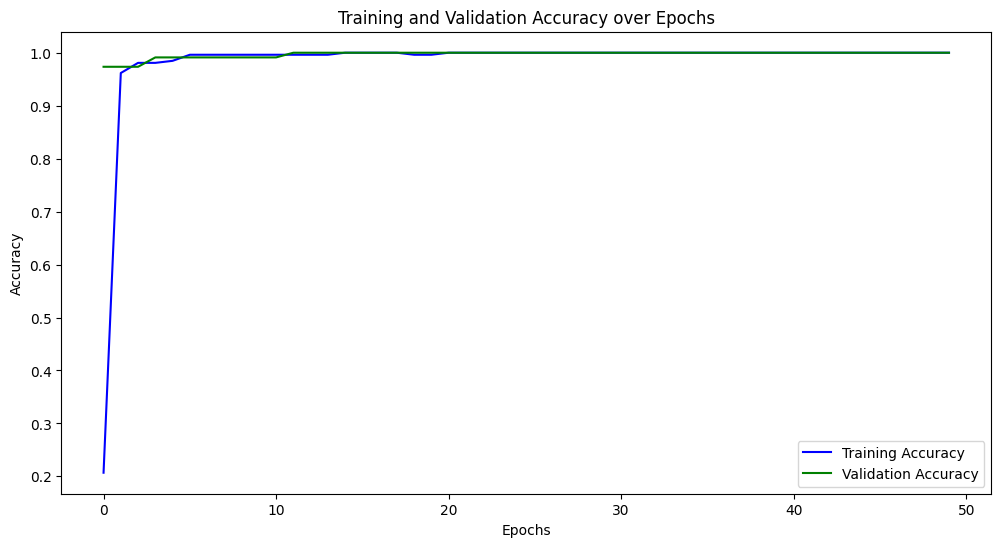

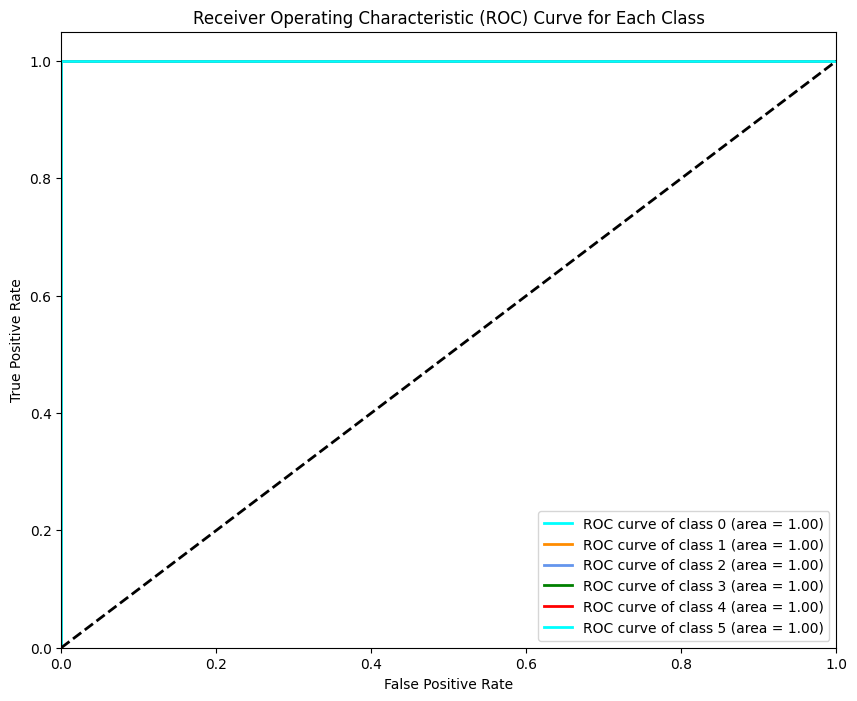

Micro-average ROC AUC: 1.00


In [ ]:
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Define the Dataset split
split_ratio = 0.3  # 70% training, 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_ratio, stratify=y, random_state=42)

# Convert numpy arrays to torch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

# Set up the new NN classifier head architecture
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(set(y))  # Number of distinct people (Classes) in the database

classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Define loss function and optimiser parameters (RMSprop was identified as the most optimal)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(classifier.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Early stopping parameters
early_stopping_patience = 5
best_val_loss = float('inf')
patience_counter = 0

# To store training and validation metrics for visualisation
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 50  # Set Epochs number for training (We will ensure early stopping aswell, to retain the best Epoch)

for epoch in range(num_epochs):
    # Training Phase
    classifier.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = classifier(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())

    # Backward pass and optimisation
    loss.backward()
    torch.nn.utils.clip_grad_norm_(classifier.parameters(), max_norm=1.0)
    optimizer.step()

    # Calculate training accuracy
    train_preds = torch.argmax(outputs, axis=1)
    train_accuracy = accuracy_score(y_train_tensor.cpu(), train_preds.cpu())
    train_accuracies.append(train_accuracy)

    # Validation Phase
    classifier.eval()
    with torch.no_grad():
        val_outputs = classifier(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        val_preds = torch.argmax(val_outputs, axis=1)
        val_accuracy = accuracy_score(y_val_tensor.cpu(), val_preds.cpu())
        val_accuracies.append(val_accuracy)

        # Additional Metrics
        val_precision = precision_score(y_val_tensor.cpu(), val_preds.cpu(), average='weighted', zero_division=1)
        val_recall = recall_score(y_val_tensor.cpu(), val_preds.cpu(), average='weighted', zero_division=1)
        val_f1 = f1_score(y_val_tensor.cpu(), val_preds.cpu(), average='weighted')

    # Learning rate scheduling
    scheduler.step(val_loss)

    # Logging
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")
    print(f"Validation Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}")

    # Early Stopping Check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(classifier.state_dict(), "best_facial_recognition_classifier.pth") #Saved locally for now within Google Collab
        print("Model improved and saved.")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Load the Best Model for Evaluation
classifier.load_state_dict(torch.load("best_facial_recognition_classifier.pth"))
classifier.eval()

# Final Validation and Metrics Reporting
with torch.no_grad():
    val_outputs = classifier(X_val_tensor)
    val_preds = torch.argmax(val_outputs, axis=1).cpu()

# Set-up Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Set-up Classification Report
report = classification_report(y_val, val_preds, target_names=[idx_to_label[idx] for idx in range(num_classes)])
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[idx_to_label[idx] for idx in range(num_classes)],
            yticklabels=[idx_to_label[idx] for idx in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Set-up ROC Curve for Multi-class Classification (For evaluating performance across all 6 classes)

# Binarise the labels for multi-class ROC
y_val_binarized = label_binarize(y_val_tensor.cpu(), classes=range(num_classes))
y_val_pred_proba = torch.softmax(val_outputs, dim=1).cpu().numpy()  # Get probability scores from model outputs

# Compute ROC curve and ROC Area Under The Curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

# Compute the micro-average ROC AUC for evaluating each class independently
fpr_micro, tpr_micro, _ = roc_curve(y_val_binarized.ravel(), y_val_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

print(f"Micro-average ROC AUC: {roc_auc_micro:.2f}")


# **Testing Model Performance on Unseen Images (Upload from Device)**

In [ ]:
import ipywidgets as widgets
import torch
import torch.nn as nn
import numpy as np
from IPython.display import display
import io
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1
from torchvision import transforms

import torch
import torch
import torch.nn as nn

In [ ]:
import json

# We do this to retain the correct label-mapping order, as shown in the classification report (Optional, but ensures robustness)

# Label encoding during training
label_to_idx = {name: idx for idx, name in enumerate(set(known_face_names))}

# Save the label-to-index mapping
with open('label_to_idx.json', 'w') as f:
    json.dump(label_to_idx, f)


# **Test 1: Perform Facial Matching on an image with colour-distortion**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-18-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
/usr/local/lib/python3.10/dist-pa

Model loaded successfully and ready for inference.


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)

# **Test 2: Perform Facial Matching on an image with person smiling (Varying expression)**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-19-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))


Model loaded successfully and ready for inference.


# **Test 3: Peform Facial Matching on a low-quality image with blur**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-21-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))


Model loaded successfully and ready for inference.


# **Test 4: Perform Facial Matching on an image with increased brightness (Light on face)**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-23-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))


Model loaded successfully and ready for inference.


# **Test 5: Perform Facial Matching on an image under normal conditions (Clear high-quality)**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-24-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))


Model loaded successfully and ready for inference.


# **Test 6: Perform Facial Matching on an old image (To test if age variance  affects performance)**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-25-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))


Model loaded successfully and ready for inference.


# **Test 7: Perform Facial Matching on an unkown person (Not a part of our database)**

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the label-to-index mapping (generated during training)
with open('label_to_idx.json', 'r') as f:
    label_to_idx = json.load(f)

# Create the index-to-label mapping to get the correct `known_face_names` order
idx_to_label = {idx: name for name, idx in label_to_idx.items()}
known_face_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]

# Load the trained NN model (Saved Locally)
MODEL_PATH = "/content/best_facial_recognition_classifier.pth"

# Define the NN architecture (same as the one used for training)
embedding_size = 512  # InceptionResnetV1 outputs 512-dimensional embeddings
num_classes = len(known_face_names)  # Set number of distinct people (classes)

# Load the trained NN
loaded_classifier = nn.Sequential(
    nn.Linear(embedding_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
).to(device)

# Load the saved model parameters (state_dict)
loaded_classifier.load_state_dict(torch.load(MODEL_PATH))
loaded_classifier.eval()  # Set the model for evaluation
print("Model loaded successfully and ready for inference.")

#Initialise MTCNN and Resnet for feature extraction (From unseen images uploaded by user)
# Initialise MTCNN for face detection
mtcnn = MTCNN(keep_all=False, device=device)

# Initialise InceptionResnetV1 for embedding extraction
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to get embedding from unseen image and bounding box coordinates for visualisation
def get_embedding_and_box_from_image(image):
    try:
        img = Image.open(image).convert('RGB')
        boxes, _ = mtcnn.detect(img)
        if boxes is not None and len(boxes) > 0:
            box = boxes[0]
            # Crop the image to the bounding box
            img_cropped = img.crop((box[0], box[1], box[2], box[3]))

            # Resize and transform the cropped image for the resnet model
            img_cropped = img_cropped.resize((160, 160))
            img_tensor = transforms.ToTensor()(img_cropped).unsqueeze(0).to(device)  # Add batch dimension

            # Extract the embedding
            with torch.no_grad():
                embedding = resnet(img_tensor)
            return embedding[0], box
        return None, None
    except Exception as e:
        print(f"[ERROR] Error processing image: {e}")
        return None, None

# Function to classify unseen image using the loaded NN model
def classify_unseen_image_with_model(unseen_embedding):
    if unseen_embedding is None:
        return "Unknown", None

    # Pass the embedding through the loaded NN model
    with torch.no_grad():
        unseen_embedding = unseen_embedding.unsqueeze(0)  # Add batch dimension
        output = loaded_classifier(unseen_embedding)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        max_probability = probabilities[0, predicted_class].item()

    # Set a threshold to determine unknown faces (Confidence Level of 0.6 and below will be filtered out as unknown faces)
    similarity_threshold = 0.6
    if max_probability >= similarity_threshold:
        return known_face_names[predicted_class], max_probability
    else:
        return "Unknown", max_probability

# Create upload widget (Button) for uploading the test image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
match_button = widgets.Button(description="Match Image", button_style='danger')
output = widgets.Output()

# Function to handle button click to perform facial matching
def on_match_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous output (When you upload again)

        # Check if an image has been uploaded
        if len(upload_widget.value) == 0:
            print("Please upload an image.")
            return

        # Get the uploaded file
        uploaded_file = next(iter(upload_widget.value.values()))
        content = uploaded_file['content']
        image = io.BytesIO(content)

        # Get embedding from the uploaded image and bounding box coordinates
        unseen_embedding, box = get_embedding_and_box_from_image(image)
        if unseen_embedding is not None and box is not None:
            # Classify the unseen image using the loaded model
            result, probability = classify_unseen_image_with_model(unseen_embedding)
            if result != "Unknown":
                print(f'Match found: {result} with confidence: {probability:.2f}')
            else:
                print(f'No match found. Highest confidence: {probability:.2f}')

            # Draw bounding box on the original image
            img = Image.open(image).convert('RGB')
            draw = ImageDraw.Draw(img)
            # Ensure box coordinates are integers and in tuple format
            box = tuple(map(int, box))
            draw.rectangle(box, outline="red", width=3)
            text = f"{result} ({probability:.2f})" if result != "Unknown" else "Unknown"
            draw.text((box[0], box[1] - 10), text, fill="red")

            # Display the image with bounding box and label (Person Name)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print('No face detected in the uploaded image.')

# Bind the click event to the button
match_button.on_click(on_match_button_clicked)

# Display the widgets
display(widgets.VBox([upload_widget, match_button, output]))


<ipython-input-26-8b645da22965>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_classifier.load_state_dict(torch.load(MODEL_PATH))


Model loaded successfully and ready for inference.


**Save Model for future use**

In [ ]:
import torch

# Now Save the Trained Model having evaluated it's training and Facial matching performance for final deployment

# Define the path to save the model in the Google Drive
MODEL_PATH = "/content/drive/MyDrive/Models/512_Deploy_Final_classifier.pth"

# Save model parameters (state_dict)
torch.save(classifier.state_dict(), MODEL_PATH)

print(f"Model saved to {MODEL_PATH}")


Model saved to /content/drive/MyDrive/Models/512_Deploy_Final_classifier.pth
